# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

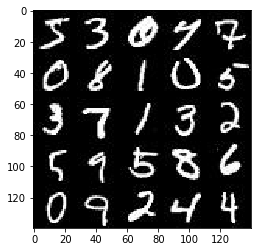

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

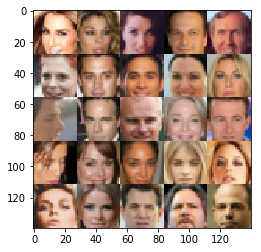

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


D:\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2

    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        # 14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        # 7x7x128
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        # 4x4x256
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [61]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 4*4*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=3, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        # print(x2.get_shape())
        # 14x14x256

        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        # print(x3.get_shape())
        # 28x28x128
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        # print(logits.get_shape())
        # 28x28x5
        
        out = tf.tanh(logits)

    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [41]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [42]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [43]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [48]:
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
print(mnist_dataset.shape)

(60000, 28, 28, 1)


In [64]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, lr = model_inputs(
        image_width=image_width, image_height=image_height, image_channels=image_channels, z_dim=z_dim)
    
    d_loss, g_loss = model_loss(
        input_real=input_real, input_z=input_z, out_channel_dim=image_channels)
    
    d_train_opt, g_train_opt = model_opt(
        d_loss=d_loss, g_loss=g_loss, learning_rate=lr, beta1=beta1)
    
    saver = tf.train.Saver()
    
    steps = 0
    show_every = 100
    loss_every = 10
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_images *= 2
                
                # Sample random noise for generator
                batch_z = np.random.uniform(-1,1, size=(batch_size, z_dim))
                
                # Run otimizers
                _ = sess.run(d_train_opt, 
                             feed_dict={input_real: batch_images, input_z: batch_z, lr: learning_rate})
                _ = sess.run(g_train_opt,
                             feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})
                
                if steps % loss_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    print('Epoch {}/{} ___'.format(epoch_i+1, epoch_count),
                          'Discriminator Loss: {:.4f} ___'.format(train_loss_d),
                          'Generator Loss: {:.4f}'.format(train_loss_g))
                    
                if steps % show_every == 0:
                    show_generator_output(
                        sess=sess, n_images=36, input_z=input_z, 
                        out_channel_dim=image_channels, image_mode=data_image_mode)
                
        
        saver.save(sess, './checkpoints/generator.ckpt')
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2 ___ Discriminator Loss: 0.1244 ___ Generator Loss: 2.3105
Epoch 1/2 ___ Discriminator Loss: 0.1050 ___ Generator Loss: 25.2772
Epoch 1/2 ___ Discriminator Loss: 1.9248 ___ Generator Loss: 14.1377
Epoch 1/2 ___ Discriminator Loss: 0.3035 ___ Generator Loss: 5.0968
Epoch 1/2 ___ Discriminator Loss: 0.7284 ___ Generator Loss: 3.0686
Epoch 1/2 ___ Discriminator Loss: 2.0612 ___ Generator Loss: 4.1521
Epoch 1/2 ___ Discriminator Loss: 0.3030 ___ Generator Loss: 3.4896
Epoch 1/2 ___ Discriminator Loss: 2.0501 ___ Generator Loss: 6.3051
Epoch 1/2 ___ Discriminator Loss: 1.1005 ___ Generator Loss: 2.4133
Epoch 1/2 ___ Discriminator Loss: 1.6395 ___ Generator Loss: 0.4057


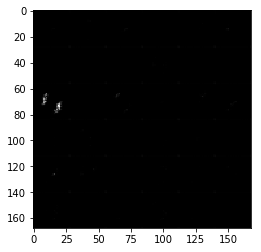

Epoch 1/2 ___ Discriminator Loss: 1.5718 ___ Generator Loss: 0.4443
Epoch 1/2 ___ Discriminator Loss: 1.7326 ___ Generator Loss: 0.3148
Epoch 1/2 ___ Discriminator Loss: 1.8939 ___ Generator Loss: 0.2725
Epoch 1/2 ___ Discriminator Loss: 1.5204 ___ Generator Loss: 0.4469
Epoch 1/2 ___ Discriminator Loss: 1.6013 ___ Generator Loss: 0.3634
Epoch 1/2 ___ Discriminator Loss: 1.6109 ___ Generator Loss: 0.3404
Epoch 1/2 ___ Discriminator Loss: 1.4041 ___ Generator Loss: 0.3971
Epoch 1/2 ___ Discriminator Loss: 1.3864 ___ Generator Loss: 0.3828
Epoch 1/2 ___ Discriminator Loss: 1.2164 ___ Generator Loss: 0.5105
Epoch 1/2 ___ Discriminator Loss: 1.1658 ___ Generator Loss: 0.5725


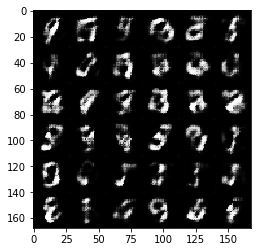

Epoch 1/2 ___ Discriminator Loss: 1.6237 ___ Generator Loss: 0.3115
Epoch 1/2 ___ Discriminator Loss: 1.3139 ___ Generator Loss: 0.4830
Epoch 1/2 ___ Discriminator Loss: 1.1128 ___ Generator Loss: 0.5823
Epoch 1/2 ___ Discriminator Loss: 1.0048 ___ Generator Loss: 0.7168
Epoch 1/2 ___ Discriminator Loss: 0.7193 ___ Generator Loss: 1.3973
Epoch 1/2 ___ Discriminator Loss: 1.1010 ___ Generator Loss: 1.4404
Epoch 1/2 ___ Discriminator Loss: 0.7441 ___ Generator Loss: 1.0410
Epoch 1/2 ___ Discriminator Loss: 1.2526 ___ Generator Loss: 0.5497
Epoch 1/2 ___ Discriminator Loss: 1.4339 ___ Generator Loss: 0.3420
Epoch 1/2 ___ Discriminator Loss: 0.8217 ___ Generator Loss: 0.9295


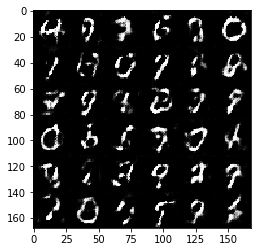

Epoch 1/2 ___ Discriminator Loss: 1.9193 ___ Generator Loss: 0.1982
Epoch 1/2 ___ Discriminator Loss: 1.4534 ___ Generator Loss: 0.3562
Epoch 1/2 ___ Discriminator Loss: 1.3351 ___ Generator Loss: 2.7489
Epoch 1/2 ___ Discriminator Loss: 0.7970 ___ Generator Loss: 1.6592
Epoch 1/2 ___ Discriminator Loss: 0.9812 ___ Generator Loss: 0.7182
Epoch 1/2 ___ Discriminator Loss: 1.3572 ___ Generator Loss: 0.3904
Epoch 1/2 ___ Discriminator Loss: 1.0529 ___ Generator Loss: 2.7730
Epoch 1/2 ___ Discriminator Loss: 0.5839 ___ Generator Loss: 1.8010
Epoch 1/2 ___ Discriminator Loss: 0.5687 ___ Generator Loss: 1.5455
Epoch 1/2 ___ Discriminator Loss: 0.6755 ___ Generator Loss: 0.9775


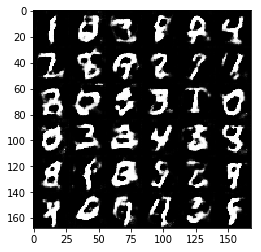

Epoch 1/2 ___ Discriminator Loss: 0.8923 ___ Generator Loss: 2.1853
Epoch 1/2 ___ Discriminator Loss: 1.3079 ___ Generator Loss: 0.4497
Epoch 1/2 ___ Discriminator Loss: 1.3997 ___ Generator Loss: 2.9714
Epoch 1/2 ___ Discriminator Loss: 0.6305 ___ Generator Loss: 1.8595
Epoch 1/2 ___ Discriminator Loss: 0.7811 ___ Generator Loss: 0.9129
Epoch 1/2 ___ Discriminator Loss: 0.8929 ___ Generator Loss: 0.7684
Epoch 2/2 ___ Discriminator Loss: 1.1767 ___ Generator Loss: 2.2264
Epoch 2/2 ___ Discriminator Loss: 1.1672 ___ Generator Loss: 0.6867
Epoch 2/2 ___ Discriminator Loss: 1.2898 ___ Generator Loss: 0.5208
Epoch 2/2 ___ Discriminator Loss: 1.5975 ___ Generator Loss: 0.3189


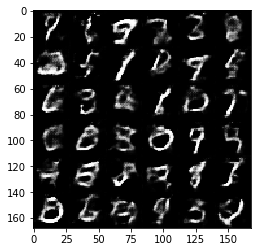

Epoch 2/2 ___ Discriminator Loss: 1.2033 ___ Generator Loss: 0.6335
Epoch 2/2 ___ Discriminator Loss: 1.3083 ___ Generator Loss: 0.4716
Epoch 2/2 ___ Discriminator Loss: 1.3415 ___ Generator Loss: 0.4412
Epoch 2/2 ___ Discriminator Loss: 1.2735 ___ Generator Loss: 0.4893
Epoch 2/2 ___ Discriminator Loss: 1.0989 ___ Generator Loss: 0.7169
Epoch 2/2 ___ Discriminator Loss: 1.5922 ___ Generator Loss: 0.3086
Epoch 2/2 ___ Discriminator Loss: 1.0158 ___ Generator Loss: 1.0704
Epoch 2/2 ___ Discriminator Loss: 1.1120 ___ Generator Loss: 1.5031
Epoch 2/2 ___ Discriminator Loss: 1.3079 ___ Generator Loss: 1.5353
Epoch 2/2 ___ Discriminator Loss: 1.2724 ___ Generator Loss: 0.4682


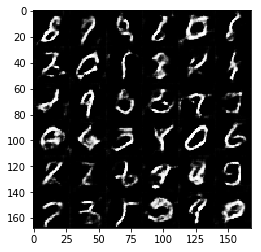

Epoch 2/2 ___ Discriminator Loss: 1.1877 ___ Generator Loss: 0.6233
Epoch 2/2 ___ Discriminator Loss: 1.3148 ___ Generator Loss: 0.4671
Epoch 2/2 ___ Discriminator Loss: 1.4033 ___ Generator Loss: 0.4059
Epoch 2/2 ___ Discriminator Loss: 1.3856 ___ Generator Loss: 0.4191
Epoch 2/2 ___ Discriminator Loss: 1.3005 ___ Generator Loss: 0.4643
Epoch 2/2 ___ Discriminator Loss: 1.2531 ___ Generator Loss: 0.5451
Epoch 2/2 ___ Discriminator Loss: 1.0264 ___ Generator Loss: 0.7497
Epoch 2/2 ___ Discriminator Loss: 1.2059 ___ Generator Loss: 0.5461
Epoch 2/2 ___ Discriminator Loss: 1.1899 ___ Generator Loss: 0.5415
Epoch 2/2 ___ Discriminator Loss: 1.3602 ___ Generator Loss: 0.4167


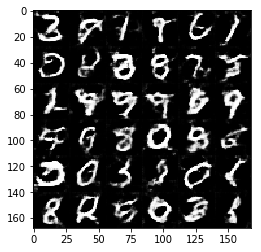

Epoch 2/2 ___ Discriminator Loss: 1.2087 ___ Generator Loss: 0.5211
Epoch 2/2 ___ Discriminator Loss: 0.9096 ___ Generator Loss: 1.3347
Epoch 2/2 ___ Discriminator Loss: 1.1534 ___ Generator Loss: 0.7608
Epoch 2/2 ___ Discriminator Loss: 1.0116 ___ Generator Loss: 1.1245
Epoch 2/2 ___ Discriminator Loss: 1.0673 ___ Generator Loss: 0.6882
Epoch 2/2 ___ Discriminator Loss: 1.1377 ___ Generator Loss: 0.6118
Epoch 2/2 ___ Discriminator Loss: 1.3122 ___ Generator Loss: 0.4484
Epoch 2/2 ___ Discriminator Loss: 1.2650 ___ Generator Loss: 0.4773
Epoch 2/2 ___ Discriminator Loss: 1.5624 ___ Generator Loss: 0.3048
Epoch 2/2 ___ Discriminator Loss: 1.1177 ___ Generator Loss: 0.6813


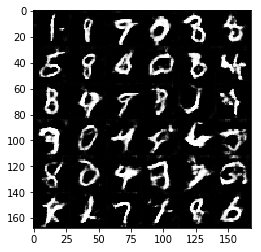

Epoch 2/2 ___ Discriminator Loss: 0.9655 ___ Generator Loss: 0.8191
Epoch 2/2 ___ Discriminator Loss: 2.2216 ___ Generator Loss: 2.3185
Epoch 2/2 ___ Discriminator Loss: 0.9977 ___ Generator Loss: 0.7368
Epoch 2/2 ___ Discriminator Loss: 1.1011 ___ Generator Loss: 0.6994
Epoch 2/2 ___ Discriminator Loss: 1.0625 ___ Generator Loss: 1.2632
Epoch 2/2 ___ Discriminator Loss: 1.0286 ___ Generator Loss: 0.7420
Epoch 2/2 ___ Discriminator Loss: 1.4572 ___ Generator Loss: 1.5377
Epoch 2/2 ___ Discriminator Loss: 1.0226 ___ Generator Loss: 1.0780
Epoch 2/2 ___ Discriminator Loss: 0.9251 ___ Generator Loss: 1.0575
Epoch 2/2 ___ Discriminator Loss: 1.1650 ___ Generator Loss: 1.2186


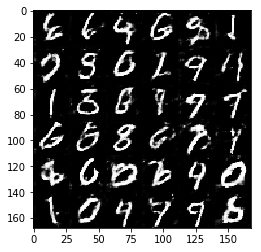

Epoch 2/2 ___ Discriminator Loss: 0.9925 ___ Generator Loss: 1.0441
Epoch 2/2 ___ Discriminator Loss: 1.5499 ___ Generator Loss: 1.8861
Epoch 2/2 ___ Discriminator Loss: 0.9757 ___ Generator Loss: 0.9996


In [68]:
batch_size = 128
z_dim = 150
learning_rate = 0.0005
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1 ___ Discriminator Loss: 0.2006 ___ Generator Loss: 17.6756
Epoch 1/1 ___ Discriminator Loss: 0.0588 ___ Generator Loss: 18.8316
Epoch 1/1 ___ Discriminator Loss: 0.0238 ___ Generator Loss: 4.4917
Epoch 1/1 ___ Discriminator Loss: 0.0124 ___ Generator Loss: 4.7615
Epoch 1/1 ___ Discriminator Loss: 0.0136 ___ Generator Loss: 4.6515
Epoch 1/1 ___ Discriminator Loss: 0.0672 ___ Generator Loss: 3.2071
Epoch 1/1 ___ Discriminator Loss: 0.0511 ___ Generator Loss: 3.8469
Epoch 1/1 ___ Discriminator Loss: 3.7050 ___ Generator Loss: 30.2335
Epoch 1/1 ___ Discriminator Loss: 0.0802 ___ Generator Loss: 5.0248
Epoch 1/1 ___ Discriminator Loss: 2.6100 ___ Generator Loss: 10.3209


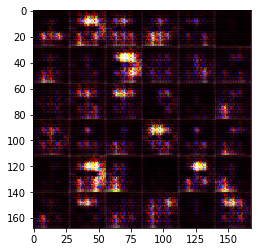

Epoch 1/1 ___ Discriminator Loss: 0.9027 ___ Generator Loss: 1.3597
Epoch 1/1 ___ Discriminator Loss: 0.9780 ___ Generator Loss: 5.6877
Epoch 1/1 ___ Discriminator Loss: 0.5283 ___ Generator Loss: 1.3171
Epoch 1/1 ___ Discriminator Loss: 1.7745 ___ Generator Loss: 0.2590
Epoch 1/1 ___ Discriminator Loss: 1.6626 ___ Generator Loss: 7.1802
Epoch 1/1 ___ Discriminator Loss: 0.2735 ___ Generator Loss: 1.8339
Epoch 1/1 ___ Discriminator Loss: 0.4571 ___ Generator Loss: 3.3192
Epoch 1/1 ___ Discriminator Loss: 0.6539 ___ Generator Loss: 1.7971
Epoch 1/1 ___ Discriminator Loss: 0.7187 ___ Generator Loss: 1.0719
Epoch 1/1 ___ Discriminator Loss: 0.6923 ___ Generator Loss: 4.2978


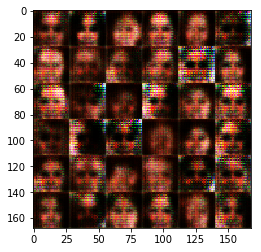

Epoch 1/1 ___ Discriminator Loss: 1.5403 ___ Generator Loss: 3.0125
Epoch 1/1 ___ Discriminator Loss: 2.2942 ___ Generator Loss: 0.1554
Epoch 1/1 ___ Discriminator Loss: 1.4929 ___ Generator Loss: 0.3585
Epoch 1/1 ___ Discriminator Loss: 0.9515 ___ Generator Loss: 0.6714
Epoch 1/1 ___ Discriminator Loss: 1.3890 ___ Generator Loss: 3.1798
Epoch 1/1 ___ Discriminator Loss: 0.7545 ___ Generator Loss: 0.9420
Epoch 1/1 ___ Discriminator Loss: 1.2802 ___ Generator Loss: 0.4671
Epoch 1/1 ___ Discriminator Loss: 1.5198 ___ Generator Loss: 0.3213
Epoch 1/1 ___ Discriminator Loss: 0.4245 ___ Generator Loss: 2.4410
Epoch 1/1 ___ Discriminator Loss: 0.6129 ___ Generator Loss: 2.7223


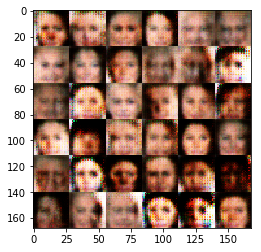

Epoch 1/1 ___ Discriminator Loss: 1.0770 ___ Generator Loss: 0.6152
Epoch 1/1 ___ Discriminator Loss: 0.9926 ___ Generator Loss: 0.7883
Epoch 1/1 ___ Discriminator Loss: 1.0729 ___ Generator Loss: 0.6122
Epoch 1/1 ___ Discriminator Loss: 1.7896 ___ Generator Loss: 0.2423
Epoch 1/1 ___ Discriminator Loss: 1.5575 ___ Generator Loss: 0.3070
Epoch 1/1 ___ Discriminator Loss: 0.7717 ___ Generator Loss: 1.0426
Epoch 1/1 ___ Discriminator Loss: 1.5175 ___ Generator Loss: 1.2331
Epoch 1/1 ___ Discriminator Loss: 1.7284 ___ Generator Loss: 0.8647
Epoch 1/1 ___ Discriminator Loss: 1.3651 ___ Generator Loss: 0.7549
Epoch 1/1 ___ Discriminator Loss: 0.7135 ___ Generator Loss: 2.4313


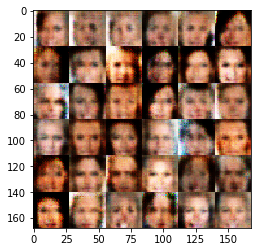

Epoch 1/1 ___ Discriminator Loss: 1.2855 ___ Generator Loss: 1.6237
Epoch 1/1 ___ Discriminator Loss: 0.7321 ___ Generator Loss: 1.4044
Epoch 1/1 ___ Discriminator Loss: 0.8159 ___ Generator Loss: 1.4562
Epoch 1/1 ___ Discriminator Loss: 0.7734 ___ Generator Loss: 1.9992
Epoch 1/1 ___ Discriminator Loss: 0.8795 ___ Generator Loss: 2.3542
Epoch 1/1 ___ Discriminator Loss: 1.5887 ___ Generator Loss: 0.3517
Epoch 1/1 ___ Discriminator Loss: 1.5014 ___ Generator Loss: 0.3292
Epoch 1/1 ___ Discriminator Loss: 1.0490 ___ Generator Loss: 0.6432
Epoch 1/1 ___ Discriminator Loss: 1.5143 ___ Generator Loss: 0.9268
Epoch 1/1 ___ Discriminator Loss: 0.7502 ___ Generator Loss: 2.3699


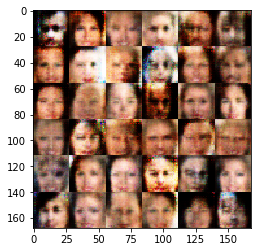

Epoch 1/1 ___ Discriminator Loss: 1.0067 ___ Generator Loss: 1.8198
Epoch 1/1 ___ Discriminator Loss: 1.1849 ___ Generator Loss: 1.2573
Epoch 1/1 ___ Discriminator Loss: 1.4357 ___ Generator Loss: 0.9677
Epoch 1/1 ___ Discriminator Loss: 1.2680 ___ Generator Loss: 0.5744
Epoch 1/1 ___ Discriminator Loss: 1.6775 ___ Generator Loss: 0.2750
Epoch 1/1 ___ Discriminator Loss: 1.0290 ___ Generator Loss: 1.1006
Epoch 1/1 ___ Discriminator Loss: 0.7372 ___ Generator Loss: 1.4890
Epoch 1/1 ___ Discriminator Loss: 1.4329 ___ Generator Loss: 0.3803
Epoch 1/1 ___ Discriminator Loss: 1.5219 ___ Generator Loss: 0.2973
Epoch 1/1 ___ Discriminator Loss: 0.8444 ___ Generator Loss: 0.9115


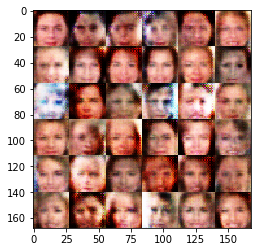

Epoch 1/1 ___ Discriminator Loss: 1.3411 ___ Generator Loss: 1.6858
Epoch 1/1 ___ Discriminator Loss: 0.7574 ___ Generator Loss: 1.0670
Epoch 1/1 ___ Discriminator Loss: 0.7007 ___ Generator Loss: 2.3571
Epoch 1/1 ___ Discriminator Loss: 1.3947 ___ Generator Loss: 1.1261
Epoch 1/1 ___ Discriminator Loss: 2.1788 ___ Generator Loss: 1.7704
Epoch 1/1 ___ Discriminator Loss: 1.2238 ___ Generator Loss: 0.5911
Epoch 1/1 ___ Discriminator Loss: 0.6098 ___ Generator Loss: 1.6224
Epoch 1/1 ___ Discriminator Loss: 0.9493 ___ Generator Loss: 1.2832
Epoch 1/1 ___ Discriminator Loss: 1.3553 ___ Generator Loss: 0.3674
Epoch 1/1 ___ Discriminator Loss: 0.8222 ___ Generator Loss: 0.8995


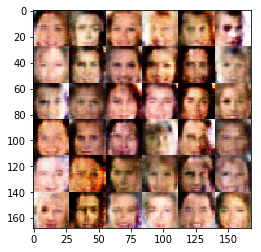

Epoch 1/1 ___ Discriminator Loss: 1.5138 ___ Generator Loss: 0.3338
Epoch 1/1 ___ Discriminator Loss: 0.8937 ___ Generator Loss: 1.0899
Epoch 1/1 ___ Discriminator Loss: 1.5112 ___ Generator Loss: 0.5307
Epoch 1/1 ___ Discriminator Loss: 1.4503 ___ Generator Loss: 0.5391
Epoch 1/1 ___ Discriminator Loss: 0.6890 ___ Generator Loss: 1.7853
Epoch 1/1 ___ Discriminator Loss: 1.0592 ___ Generator Loss: 1.2709
Epoch 1/1 ___ Discriminator Loss: 0.7141 ___ Generator Loss: 1.7351
Epoch 1/1 ___ Discriminator Loss: 1.6207 ___ Generator Loss: 2.0992
Epoch 1/1 ___ Discriminator Loss: 0.9645 ___ Generator Loss: 0.7040
Epoch 1/1 ___ Discriminator Loss: 1.0901 ___ Generator Loss: 1.2257


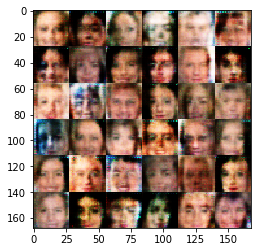

Epoch 1/1 ___ Discriminator Loss: 0.8944 ___ Generator Loss: 2.7999
Epoch 1/1 ___ Discriminator Loss: 1.1052 ___ Generator Loss: 2.3210
Epoch 1/1 ___ Discriminator Loss: 1.2223 ___ Generator Loss: 1.2867
Epoch 1/1 ___ Discriminator Loss: 0.6923 ___ Generator Loss: 0.9437
Epoch 1/1 ___ Discriminator Loss: 1.4831 ___ Generator Loss: 0.7282
Epoch 1/1 ___ Discriminator Loss: 1.5806 ___ Generator Loss: 0.3546
Epoch 1/1 ___ Discriminator Loss: 1.1399 ___ Generator Loss: 0.4900
Epoch 1/1 ___ Discriminator Loss: 1.1084 ___ Generator Loss: 0.6185
Epoch 1/1 ___ Discriminator Loss: 1.4625 ___ Generator Loss: 0.4049
Epoch 1/1 ___ Discriminator Loss: 1.3428 ___ Generator Loss: 0.4465


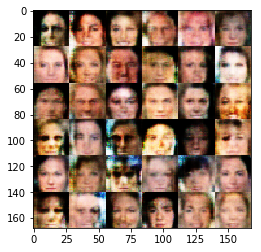

Epoch 1/1 ___ Discriminator Loss: 1.2109 ___ Generator Loss: 1.4146
Epoch 1/1 ___ Discriminator Loss: 0.6346 ___ Generator Loss: 2.7950
Epoch 1/1 ___ Discriminator Loss: 1.5536 ___ Generator Loss: 0.3406
Epoch 1/1 ___ Discriminator Loss: 0.9083 ___ Generator Loss: 0.8523
Epoch 1/1 ___ Discriminator Loss: 1.1260 ___ Generator Loss: 0.5518
Epoch 1/1 ___ Discriminator Loss: 1.3669 ___ Generator Loss: 0.4728
Epoch 1/1 ___ Discriminator Loss: 0.5756 ___ Generator Loss: 2.0595
Epoch 1/1 ___ Discriminator Loss: 0.7243 ___ Generator Loss: 1.3685
Epoch 1/1 ___ Discriminator Loss: 1.6321 ___ Generator Loss: 0.2933
Epoch 1/1 ___ Discriminator Loss: 0.8715 ___ Generator Loss: 0.7270


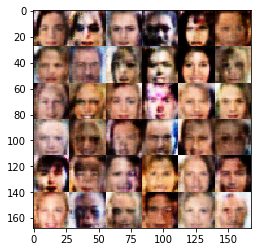

Epoch 1/1 ___ Discriminator Loss: 1.2121 ___ Generator Loss: 0.8353
Epoch 1/1 ___ Discriminator Loss: 1.1682 ___ Generator Loss: 0.7275
Epoch 1/1 ___ Discriminator Loss: 0.8061 ___ Generator Loss: 1.9378
Epoch 1/1 ___ Discriminator Loss: 1.0733 ___ Generator Loss: 0.5329
Epoch 1/1 ___ Discriminator Loss: 1.5127 ___ Generator Loss: 0.3755
Epoch 1/1 ___ Discriminator Loss: 1.5197 ___ Generator Loss: 2.2668
Epoch 1/1 ___ Discriminator Loss: 0.5153 ___ Generator Loss: 2.2425
Epoch 1/1 ___ Discriminator Loss: 1.3621 ___ Generator Loss: 0.3926
Epoch 1/1 ___ Discriminator Loss: 0.8447 ___ Generator Loss: 1.8235
Epoch 1/1 ___ Discriminator Loss: 0.4941 ___ Generator Loss: 1.9562


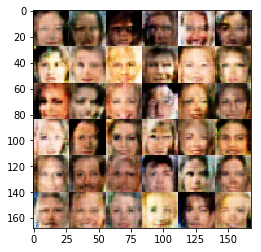

Epoch 1/1 ___ Discriminator Loss: 0.8029 ___ Generator Loss: 1.4939
Epoch 1/1 ___ Discriminator Loss: 1.5394 ___ Generator Loss: 0.4221
Epoch 1/1 ___ Discriminator Loss: 1.2835 ___ Generator Loss: 0.4855
Epoch 1/1 ___ Discriminator Loss: 0.9772 ___ Generator Loss: 0.6220
Epoch 1/1 ___ Discriminator Loss: 1.8331 ___ Generator Loss: 2.5013
Epoch 1/1 ___ Discriminator Loss: 1.0792 ___ Generator Loss: 0.9633
Epoch 1/1 ___ Discriminator Loss: 1.1003 ___ Generator Loss: 0.6314
Epoch 1/1 ___ Discriminator Loss: 0.5794 ___ Generator Loss: 1.0588
Epoch 1/1 ___ Discriminator Loss: 1.2543 ___ Generator Loss: 0.7628
Epoch 1/1 ___ Discriminator Loss: 1.1341 ___ Generator Loss: 0.7839


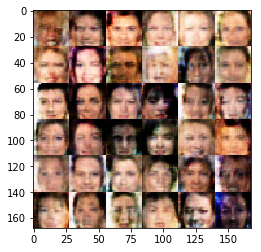

Epoch 1/1 ___ Discriminator Loss: 0.8938 ___ Generator Loss: 1.0904
Epoch 1/1 ___ Discriminator Loss: 0.8099 ___ Generator Loss: 1.0410
Epoch 1/1 ___ Discriminator Loss: 1.2951 ___ Generator Loss: 0.4265
Epoch 1/1 ___ Discriminator Loss: 2.3410 ___ Generator Loss: 2.7970
Epoch 1/1 ___ Discriminator Loss: 0.8206 ___ Generator Loss: 1.3186
Epoch 1/1 ___ Discriminator Loss: 1.4265 ___ Generator Loss: 1.6119
Epoch 1/1 ___ Discriminator Loss: 0.6206 ___ Generator Loss: 1.6241
Epoch 1/1 ___ Discriminator Loss: 0.3992 ___ Generator Loss: 2.0407
Epoch 1/1 ___ Discriminator Loss: 0.8247 ___ Generator Loss: 1.0231
Epoch 1/1 ___ Discriminator Loss: 1.2586 ___ Generator Loss: 0.4693


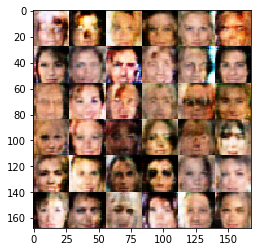

Epoch 1/1 ___ Discriminator Loss: 1.1080 ___ Generator Loss: 0.5144
Epoch 1/1 ___ Discriminator Loss: 0.9342 ___ Generator Loss: 1.0724
Epoch 1/1 ___ Discriminator Loss: 1.4654 ___ Generator Loss: 0.3543
Epoch 1/1 ___ Discriminator Loss: 0.6984 ___ Generator Loss: 1.2648
Epoch 1/1 ___ Discriminator Loss: 1.1099 ___ Generator Loss: 0.8049
Epoch 1/1 ___ Discriminator Loss: 1.2377 ___ Generator Loss: 0.5111
Epoch 1/1 ___ Discriminator Loss: 1.1009 ___ Generator Loss: 2.1449
Epoch 1/1 ___ Discriminator Loss: 0.5888 ___ Generator Loss: 2.3867
Epoch 1/1 ___ Discriminator Loss: 1.3170 ___ Generator Loss: 0.4904
Epoch 1/1 ___ Discriminator Loss: 1.2059 ___ Generator Loss: 1.8539


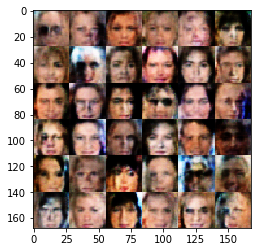

Epoch 1/1 ___ Discriminator Loss: 1.3699 ___ Generator Loss: 0.3856
Epoch 1/1 ___ Discriminator Loss: 1.1788 ___ Generator Loss: 0.7777
Epoch 1/1 ___ Discriminator Loss: 1.5040 ___ Generator Loss: 0.3999
Epoch 1/1 ___ Discriminator Loss: 1.2495 ___ Generator Loss: 0.7901
Epoch 1/1 ___ Discriminator Loss: 1.3760 ___ Generator Loss: 2.0181
Epoch 1/1 ___ Discriminator Loss: 1.2617 ___ Generator Loss: 0.5731
Epoch 1/1 ___ Discriminator Loss: 0.5713 ___ Generator Loss: 1.3010
Epoch 1/1 ___ Discriminator Loss: 1.0854 ___ Generator Loss: 2.2436
Epoch 1/1 ___ Discriminator Loss: 0.6577 ___ Generator Loss: 1.1606
Epoch 1/1 ___ Discriminator Loss: 1.1333 ___ Generator Loss: 0.9663


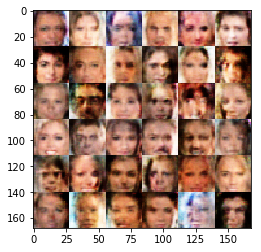

Epoch 1/1 ___ Discriminator Loss: 1.3778 ___ Generator Loss: 1.4678
Epoch 1/1 ___ Discriminator Loss: 0.5079 ___ Generator Loss: 1.3789
Epoch 1/1 ___ Discriminator Loss: 1.0573 ___ Generator Loss: 0.8540
Epoch 1/1 ___ Discriminator Loss: 1.6815 ___ Generator Loss: 2.6237
Epoch 1/1 ___ Discriminator Loss: 0.8590 ___ Generator Loss: 0.8826
Epoch 1/1 ___ Discriminator Loss: 0.5632 ___ Generator Loss: 1.8509
Epoch 1/1 ___ Discriminator Loss: 1.3809 ___ Generator Loss: 1.7876
Epoch 1/1 ___ Discriminator Loss: 1.0287 ___ Generator Loss: 1.3910
Epoch 1/1 ___ Discriminator Loss: 0.8473 ___ Generator Loss: 0.8051
Epoch 1/1 ___ Discriminator Loss: 1.2418 ___ Generator Loss: 1.5551


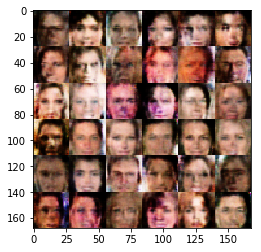

Epoch 1/1 ___ Discriminator Loss: 1.4203 ___ Generator Loss: 1.4349
Epoch 1/1 ___ Discriminator Loss: 1.1390 ___ Generator Loss: 0.8623
Epoch 1/1 ___ Discriminator Loss: 1.2794 ___ Generator Loss: 1.2200
Epoch 1/1 ___ Discriminator Loss: 0.8766 ___ Generator Loss: 0.7106
Epoch 1/1 ___ Discriminator Loss: 0.9901 ___ Generator Loss: 1.2055
Epoch 1/1 ___ Discriminator Loss: 0.4963 ___ Generator Loss: 2.8487
Epoch 1/1 ___ Discriminator Loss: 0.3687 ___ Generator Loss: 1.8469
Epoch 1/1 ___ Discriminator Loss: 1.1498 ___ Generator Loss: 1.1126
Epoch 1/1 ___ Discriminator Loss: 1.2447 ___ Generator Loss: 2.0048
Epoch 1/1 ___ Discriminator Loss: 0.9666 ___ Generator Loss: 0.6322


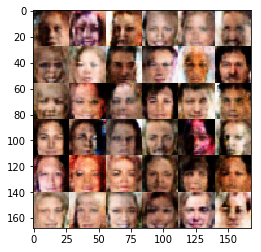

Epoch 1/1 ___ Discriminator Loss: 1.2732 ___ Generator Loss: 0.4788
Epoch 1/1 ___ Discriminator Loss: 1.2394 ___ Generator Loss: 0.5529
Epoch 1/1 ___ Discriminator Loss: 1.1374 ___ Generator Loss: 0.5706
Epoch 1/1 ___ Discriminator Loss: 1.8477 ___ Generator Loss: 0.2131
Epoch 1/1 ___ Discriminator Loss: 0.5399 ___ Generator Loss: 1.5256
Epoch 1/1 ___ Discriminator Loss: 0.5816 ___ Generator Loss: 1.2869
Epoch 1/1 ___ Discriminator Loss: 1.6454 ___ Generator Loss: 0.2795
Epoch 1/1 ___ Discriminator Loss: 0.4366 ___ Generator Loss: 1.9890
Epoch 1/1 ___ Discriminator Loss: 0.6554 ___ Generator Loss: 3.1020
Epoch 1/1 ___ Discriminator Loss: 0.5969 ___ Generator Loss: 2.8826


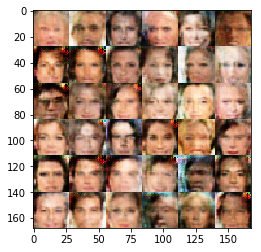

Epoch 1/1 ___ Discriminator Loss: 0.1330 ___ Generator Loss: 3.0442
Epoch 1/1 ___ Discriminator Loss: 0.3152 ___ Generator Loss: 3.2098
Epoch 1/1 ___ Discriminator Loss: 0.7376 ___ Generator Loss: 0.8138
Epoch 1/1 ___ Discriminator Loss: 0.4151 ___ Generator Loss: 2.0920
Epoch 1/1 ___ Discriminator Loss: 0.5027 ___ Generator Loss: 3.8077
Epoch 1/1 ___ Discriminator Loss: 0.1497 ___ Generator Loss: 2.9284
Epoch 1/1 ___ Discriminator Loss: 1.6396 ___ Generator Loss: 3.1824
Epoch 1/1 ___ Discriminator Loss: 0.7944 ___ Generator Loss: 1.4482
Epoch 1/1 ___ Discriminator Loss: 0.9123 ___ Generator Loss: 0.6959
Epoch 1/1 ___ Discriminator Loss: 0.4680 ___ Generator Loss: 1.5215


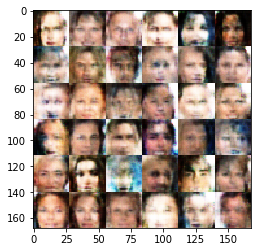

Epoch 1/1 ___ Discriminator Loss: 0.6642 ___ Generator Loss: 1.2807
Epoch 1/1 ___ Discriminator Loss: 0.6964 ___ Generator Loss: 1.0117
Epoch 1/1 ___ Discriminator Loss: 0.3882 ___ Generator Loss: 1.6300
Epoch 1/1 ___ Discriminator Loss: 0.2567 ___ Generator Loss: 2.3000
Epoch 1/1 ___ Discriminator Loss: 0.3856 ___ Generator Loss: 3.1241
Epoch 1/1 ___ Discriminator Loss: 1.0194 ___ Generator Loss: 1.6254
Epoch 1/1 ___ Discriminator Loss: 0.5021 ___ Generator Loss: 2.8986
Epoch 1/1 ___ Discriminator Loss: 0.2964 ___ Generator Loss: 1.8341
Epoch 1/1 ___ Discriminator Loss: 0.3789 ___ Generator Loss: 1.5690
Epoch 1/1 ___ Discriminator Loss: 0.1115 ___ Generator Loss: 3.7690


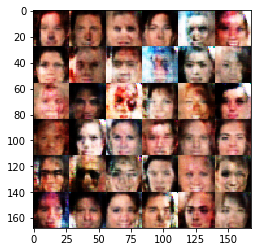

Epoch 1/1 ___ Discriminator Loss: 1.2745 ___ Generator Loss: 0.4477
Epoch 1/1 ___ Discriminator Loss: 0.8357 ___ Generator Loss: 1.2514
Epoch 1/1 ___ Discriminator Loss: 1.6850 ___ Generator Loss: 1.0899
Epoch 1/1 ___ Discriminator Loss: 0.9197 ___ Generator Loss: 4.7061
Epoch 1/1 ___ Discriminator Loss: 0.6780 ___ Generator Loss: 1.2664
Epoch 1/1 ___ Discriminator Loss: 0.6727 ___ Generator Loss: 0.8799
Epoch 1/1 ___ Discriminator Loss: 0.2490 ___ Generator Loss: 2.1072
Epoch 1/1 ___ Discriminator Loss: 0.9839 ___ Generator Loss: 0.6416
Epoch 1/1 ___ Discriminator Loss: 0.2510 ___ Generator Loss: 2.1384
Epoch 1/1 ___ Discriminator Loss: 0.4646 ___ Generator Loss: 2.0353


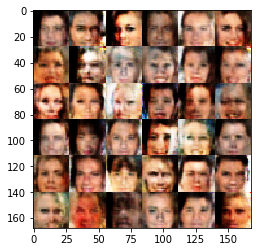

Epoch 1/1 ___ Discriminator Loss: 1.0637 ___ Generator Loss: 0.5886


In [69]:
batch_size = 96
z_dim = 150
learning_rate = 0.0003
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.